#Duplicidad de imágenes usando GCP
Con esta prueba de concepto, se busca encontrar duplicidad de un catálogo de imágenes a partir del uso de embeddings para encontrar similitudes o diferencias.


```
https://cloud.google.com/free/?utm_source=google&utm_medium=cpc&utm_campaign=latam-LATAM-all-es-dr-sitelink-all-all-trial-e-dr-1707800&utm_content=text-ad-none-any-DEV_c-CRE_512379899402-ADGP_Hybrid+%7C+BKWS+-+EXA+%7C+Txt_GCP-General-KWID_43700062784667416-kwd-301173107424&utm_term=KW_google+cloud-ST_Google+Cloud&gad_source=1&gclid=CjwKCAjwg-24BhB_EiwA1ZOx8scM8-IMtvHG4pOlLWKDmGwQASSFlKeWTwfNhiiU1qye8u7p1C1EWhoCRmMQAvD_BwE&gclsrc=aw.ds&hl=en
```

## Dependencias

In [ ]:
!pip install pandas
# !pip install json
!pip install pillow
!pip install openpyxl
!pip install requests
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install google-cloud-storage
!pip install google-cloud-vision
!pip install google-cloud-aiplatform

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 13.6 MB/s eta 0:00:0000:010:01
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.9 MB/s eta 0:00:00a 0:00:01
  Using cached google_clo

In [ ]:
# Autenticar el colab (NO funciona en vscode, buscar autenticación vía gcloud o service account: https://cloud.google.com/docs/authentication)
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Google Cloud
import vertexai
from vertexai.preview.generative_models import GenerativeModel
from vertexai.preview.language_models import TextGenerationModel

# Google Credentials
from google.auth.transport.requests import Request
from google.auth import default

def _get_local_credentials():
    from google.colab import auth

    # Authenticate the user to be able to use credentials.
    auth.authenticate_user()
    credentials, _ = default()
    credentials.refresh(Request())

    return credentials

In [ ]:
PROJECT_ID = "<TU_PROYECTO>" #@param
REGION = "<REGION>" #@param
vertexai.init(project=PROJECT_ID, location=REGION)
model = GenerativeModel("gemini-1.5-pro-001")

## I.Extraer archivos


### Extraer y almacenar URI en BQ
Se extraen las imágenes del archivo y se guardan sus nombres en una tabla de BQ

In [ ]:
# Lectura del archivo
import pandas as pd
import json

# Ruta al archivo xlsx
file_path = 'imgs.xlsx'

# Leer el archivo xlsx
try:
  df = pd.read_excel(file_path)
  print("Archivo xlsx leído correctamente.")
except Exception as e:
  print(f"Error al leer el archivo xlsx: {e}")


Archivo xlsx leído correctamente.


In [ ]:
# Generación de un diccionario, a partir de la extracción de información
def row_to_json(row):
    key = row['SKU']
    value_name = row['Name']
    value_attrs = row['Atributos']

    list_values = [img for img in row[3:] if img is not None and pd.notna(img)]

    return {
        key: {
            'name': value_name,
            # 'atributos': value_attrs,
            'imgs': list_values
        }
    }

# Aplicar la función a cada fila del DataFrame
#json_data = [row_to_json(row) for index, row in df.iterrows() if index <= 1] -- Lista
# Diccionario anidado
json_data = {
    'result': {
        row['SKU']: row_to_json(row)[row['SKU']]
        for index, row in df.iterrows() if index <= 1
        }
}


# Convertir la lista de diccionarios a JSON
json_output = json.dumps(json_data, indent=4, ensure_ascii=False)

# Imprimir la salida
# print(json_output)

json_data

{'result': {1067828492: {'name': 'Donkey Kong Country Tropical Freeze Edición Estándar para Nintendo switch Juego Físico',
   'imgs': ['https://ss423.liverpool.com.mx/xl/1067828492_2p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_15p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_16p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_3p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_13p.jpg',
    'https://ss423.liverpool.com.mx/lg/1067828492.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_14p.jpg',
    'https://ss423.liverpool.com.mx/sm/1067828492.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_16p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_11p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_12p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_1p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_10p.jpg',
    'https://ss423.liverpool.com.mx/xl/1067828492_11p.jpg',
    'https://ss423.liverpool.com.mx/xl/1

In [ ]:
for sku, detalles in json_data['result'].items():
    print(f'SKU: {sku}, Detalles: {detalles}')

SKU: 1067828492, Detalles: {'name': 'Donkey Kong Country Tropical Freeze Edición Estándar para Nintendo switch Juego Físico', 'imgs': ['https://ss423.liverpool.com.mx/xl/1067828492_2p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_15p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_16p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_3p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_13p.jpg', 'https://ss423.liverpool.com.mx/lg/1067828492.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_14p.jpg', 'https://ss423.liverpool.com.mx/sm/1067828492.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_16p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_11p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_12p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_1p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_10p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_11p.jpg', 'https://ss423.liverpool.com.mx/xl/1067828492_15p.jpg', 'https://ss423.liverpool.com.mx/xl/1

## Embeddings

REFERENCIA: https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-multimodal-embeddings

In [ ]:
import vertexai
import os
from vertexai.vision_models import Image, MultiModalEmbeddingModel

model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")

folder = "images"
list_of_images = os.listdir(folder)

images = {image_name: {"image_part":Image.load_from_file(f"{folder}/{image_name}")}
          for image_name in list_of_images}

for image in images:
    image_part = images[image]["image_part"]
    embedding = model.get_embeddings(image=image_part, dimension=128,)
    images[image]["embedding"] = embedding.image_embedding



# #image = Image.load_from_file()

# embeddings = model.get_embeddings(
#     image=image,
#     dimension=1408,
# )
# print(f"Image Embedding: {embeddings.image_embedding}")
# print(f"Text Embedding: {embeddings.text_embedding}")

In [1]:
#pprint(images)

# Plotting the embeddings

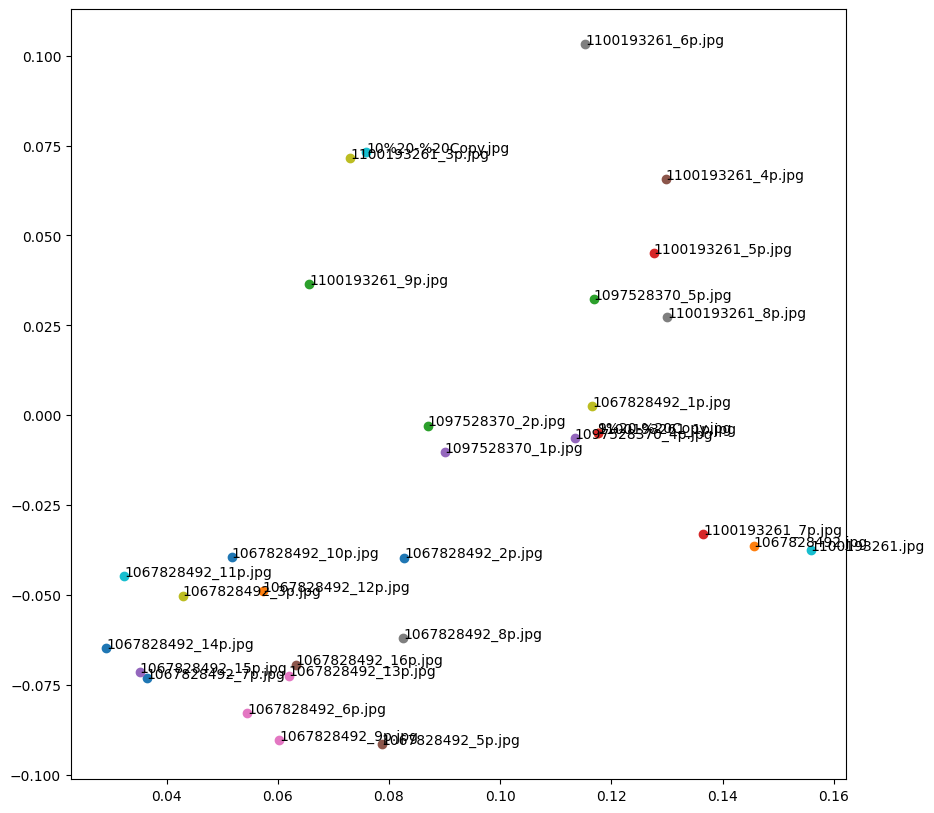

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10))

for image in images:
    embedding = images[image]["embedding"]
    x = embedding[0]
    y = embedding[1]
    plt.scatter(x, y, label=image)
    # annotating image names
    plt.text(x, y, image)
plt.show()


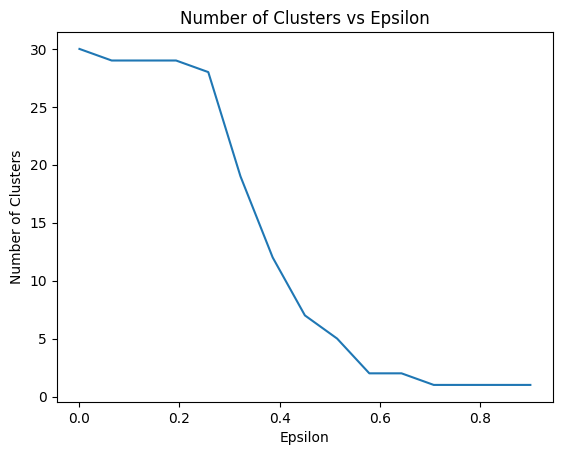

In [ ]:
# Applying dbscan to find similar images
import numpy as np
from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import StandardScaler

Epsilon = np.linspace(0.001, 0.9, 15)
METRIC = 'euclidean' # 'cosine'

num_clusters = {}
for epsilon in Epsilon:
    dbscan = DBSCAN(eps=epsilon, metric=METRIC, min_samples=1)
    embeddings = [images[image]["embedding"] for image in images]
    classes = dbscan.fit_predict(embeddings)
    num_classes = len(set(classes))
    num_clusters[epsilon] = num_classes

# plot the number of clusters vs epsilon
plt.plot(Epsilon, list(num_clusters.values()))
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Epsilon')
plt.show()


29

Using  29  clusters


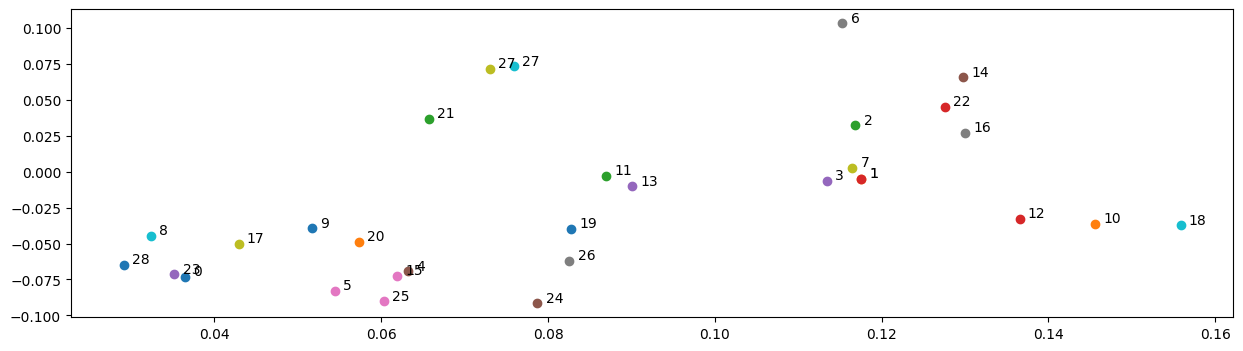

In [ ]:
# digamos epsilon =0.3

epsilon = 0.25
dbscan = DBSCAN(eps=epsilon, metric=METRIC, min_samples=1)
embeddings = [images[image]["embedding"] for image in images]
classes = dbscan.fit_predict(embeddings)
print("Using ",len(set(classes)), " clusters")

# plot the clusters
fig = plt.figure(figsize=(15, 4))
for i, image in enumerate(images):
    embedding = images[image]["embedding"]
    x = embedding[0]
    y = embedding[1]
    plt.scatter(x, y, label=f"{classes[i]}")
    # annotating image names
    plt.text(x+0.001, y+0.001, f"{classes[i]}")

Cluster 1:
	9%20-%20Copy.jpg


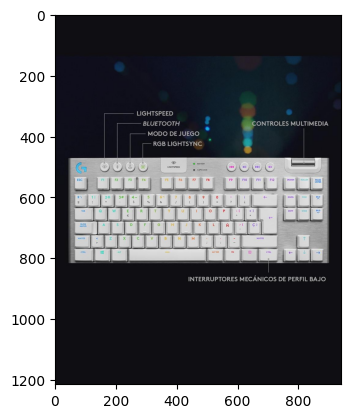

	1100193261_1p.jpg


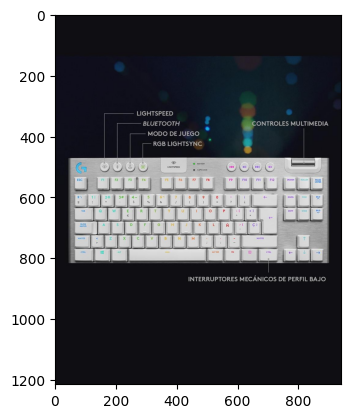

Cluster 27:
	1100193261_3p.jpg


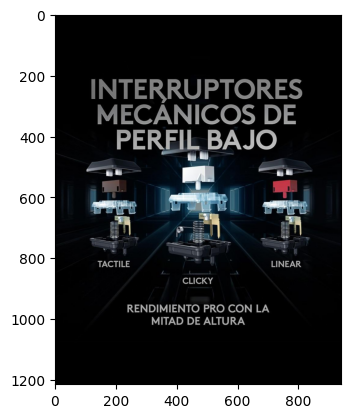

	10%20-%20Copy.jpg


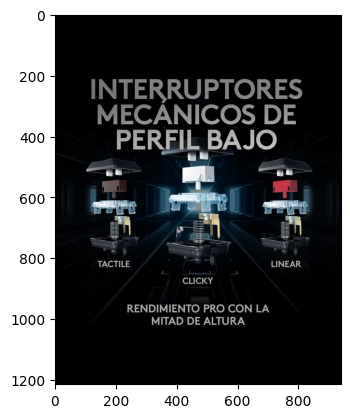

In [ ]:
from PIL import Image

clusters_with_repeated_images = [int(cluster_num) for cluster_num in set(classes) if list(classes).count(cluster_num) > 1]

clusters_with_repeated_images

for cluster in clusters_with_repeated_images:
    print(f"Cluster {cluster}:")
    for i, image in enumerate(images):
        if classes[i] == cluster:
            print(f"\t{image}")
            # show image
            plt.imshow(Image.open(f"{folder}/{image}"))
            plt.show()